# Import Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

%matplotlib inline

In [3]:
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler

In [4]:
filepath = 'https://raw.githubusercontent.com/Pieter414/BCCInternProject/main/shopping_behavior_updated.csv'

data = pd.read_csv(filepath, delimiter=',')

# Data Understanding

Tujuan Exploratory Data Analysis (EDA)


1. Memahami Data

2. Identifikasi Anomali

3. Identifikasi Pola dan Tren

4. Eksplorasi Hubungan

- Measure of Central Tendency: mean, median, modus
- Measure of Spread: variabilitas, varian, standar deviasi
- Measure of Distribution: skewness dan kurtosis

## Penjelasan Kolom

**About Dataset**

> Context:
The Consumer Behavior and Shopping Habits Dataset provides comprehensive insights into consumers' preferences, tendencies, and patterns during their shopping experiences. This dataset encompasses a diverse range of variables, including demographic information, purchase history, product preferences, shopping frequency, and online/offline shopping behavior. With this rich collection of data, analysts and researchers can delve into the intricacies of consumer decision-making processes, aiding businesses in crafting targeted marketing strategies, optimizing product offerings, and enhancing overall customer satisfaction. This dataset is essential for businesses aiming to tailor their strategies to meet customer needs and enhance their shopping experience, ultimately driving sales and loyalty.

**Dataset Glossary (Column-wise)**

> `Customer ID`: A unique identifier assigned to each individual customer, facilitating tracking and analysis of their shopping behavior over time.

> `Age`: The age of the customer, providing demographic information for segmentation and targeted marketing strategies.

> `Gender`: The gender identification of the customer, a key demographic variable influencing product preferences and purchasing patterns.

> `Item Purchased`: The specific product or item selected by the customer during the transaction.

> `Category`: The broad classification or group to which the purchased item belongs (e.g., clothing, electronics, groceries).

> `Purchase Amount (USD)`: The monetary value of the transaction, denoted in United States Dollars (USD), indicates the cost of the purchased item(s).

> `Location`: The geographical location where the purchase was made, offering insights into regional preferences and market trends.

> `Size`: The size specification (if applicable) of the purchased item, relevant for apparel, footwear, and certain consumer goods.

> `Color`: The color variant or choice associated with the purchased item, influencing customer preferences and product availability.

> `Season`: The seasonal relevance of the purchased item (e.g., spring, summer, fall, winter), impacting inventory management and marketing strategies.

> `Review Rating`: A numerical or qualitative assessment provided by the customer regarding their satisfaction with the purchased item.

> `Subscription Status`: Indicates whether the customer has opted for a subscription service, offering insights into their level of loyalty and potential for recurring revenue.

> `Shipping Type`: Specifies the method used to deliver the purchased item (e.g., standard shipping, express delivery), influencing delivery times and costs.

> `Discount Applied`: Indicates if any promotional discounts were applied to the purchase, shedding light on price sensitivity and promotion effectiveness.

> `Promo Code Used`: Notes whether a promotional code or coupon was utilized during the transaction, aiding in the evaluation of marketing campaign success.

> `Previous Purchases`: Provides information on the number or frequency of prior purchases made by the customer, contributing to customer segmentation and retention strategies.

> `Payment Method`: Specifies the mode of payment employed by the customer (e.g., credit card, cash), offering insights into preferred payment options.

> `Frequency of Purchases`: Indicates how often the customer engages in purchasing activities, a critical metric for assessing customer loyalty and lifetime value.

## Data overview

In [5]:
data.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


In [6]:
data.tail(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3890,3891,35,Female,Shirt,Clothing,81,Nebraska,XL,Green,Winter,2.6,No,Standard,No,No,33,Debit Card,Annually
3891,3892,36,Female,Dress,Clothing,30,Colorado,L,Peach,Winter,4.7,No,Free Shipping,No,No,6,Bank Transfer,Quarterly
3892,3893,35,Female,Jewelry,Accessories,86,Michigan,L,Indigo,Summer,3.5,No,Standard,No,No,5,PayPal,Fortnightly
3893,3894,21,Female,Hat,Accessories,64,Massachusetts,L,White,Fall,3.3,No,Store Pickup,No,No,29,Bank Transfer,Bi-Weekly
3894,3895,66,Female,Skirt,Clothing,78,Connecticut,L,White,Spring,3.9,No,2-Day Shipping,No,No,44,Credit Card,Every 3 Months
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly


In [7]:
data.shape

(3900, 18)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [9]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [10]:
data.describe(include="all")

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
count,3900.000000,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900
unique,NaN,NaN,2,25,4,NaN,50,4,25,4,NaN,2,6,2,2,NaN,6,7
top,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,M,Olive,Spring,NaN,No,Free Shipping,No,No,NaN,PayPal,Every 3 Months
freq,NaN,NaN,2652,171,1737,NaN,96,1755,177,999,NaN,2847,675,2223,2223,NaN,677,584
mean,1950.500000,44.068462,NaN,NaN,NaN,59.764359,NaN,NaN,NaN,NaN,3.749949,NaN,NaN,NaN,NaN,25.351538,NaN,NaN
std,1125.977353,15.207589,NaN,NaN,NaN,23.685392,NaN,NaN,NaN,NaN,0.716223,NaN,NaN,NaN,NaN,14.447125,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,975.750000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
50%,1950.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
75%,2925.250000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,38.000000,NaN,NaN


In [11]:
data.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

## Analisis Value Counts (Persebaran Data)

Pertama, ambil terlebih dahulu semua kolom object

In [12]:
def show_value_count(data, label):
  value_count = data[label].value_counts()

  print(f"\nPersebaran dari kolom {label}: \n{value_count}")

In [13]:
column_types = data.dtypes
object_columns = column_types[column_types == 'object'].index.tolist()

object_columns

['Gender',
 'Item Purchased',
 'Category',
 'Location',
 'Size',
 'Color',
 'Season',
 'Subscription Status',
 'Shipping Type',
 'Discount Applied',
 'Promo Code Used',
 'Payment Method',
 'Frequency of Purchases']

In [14]:
integer_columns = column_types[column_types == 'int64'].index.tolist()
integer_columns

['Customer ID', 'Age', 'Purchase Amount (USD)', 'Previous Purchases']

In [15]:
float_columns = column_types[column_types == 'float64'].index.tolist()
float_columns

['Review Rating']

In [16]:
show_value_count(data, 'Item Purchased')


Persebaran dari kolom Item Purchased: 
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: Item Purchased, dtype: int64


In [17]:
for column in object_columns:
  show_value_count(data, column)


Persebaran dari kolom Gender: 
Male      2652
Female    1248
Name: Gender, dtype: int64

Persebaran dari kolom Item Purchased: 
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: Item Purchased, dtype: int64

Persebaran dari kolom Category: 
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: Category, dtype: int64

Persebaran dari kolom Location: 
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86

In [18]:
for column in float_columns:
  show_value_count(data, column)


Persebaran dari kolom Review Rating: 
3.4    182
4.0    181
4.6    174
4.2    171
2.9    170
4.9    166
3.9    163
3.0    162
2.6    159
4.4    158
3.1    157
3.7    156
3.5    156
2.7    154
3.3    152
3.2    152
3.6    149
4.7    148
4.1    148
4.3    147
4.8    144
3.8    142
4.5    139
2.8    136
5.0     68
2.5     66
Name: Review Rating, dtype: int64


In [19]:
for column in integer_columns:
  show_value_count(data, column)


Persebaran dari kolom Customer ID: 
1       1
2621    1
2593    1
2594    1
2595    1
       ..
1305    1
1306    1
1307    1
1308    1
3900    1
Name: Customer ID, Length: 3900, dtype: int64

Persebaran dari kolom Age: 
69    88
57    87
41    86
25    85
49    84
50    83
54    83
27    83
62    83
32    82
19    81
58    81
42    80
43    79
28    79
31    79
37    77
46    76
29    76
68    75
59    75
63    75
56    74
36    74
55    73
52    73
64    73
35    72
51    72
65    72
40    72
45    72
47    71
66    71
30    71
23    71
38    70
53    70
18    69
21    69
26    69
34    68
48    68
24    68
39    68
70    67
22    66
61    65
60    65
33    63
20    62
67    54
44    51
Name: Age, dtype: int64

Persebaran dari kolom Purchase Amount (USD): 
94     62
32     62
36     62
51     61
90     60
       ..
100    36
87     35
49     35
69     34
61     33
Name: Purchase Amount (USD), Length: 81, dtype: int64

Persebaran dari kolom Previous Purchases: 
31    97
21    96
14  

## Missing Values

In [20]:
data.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

Disimpulkan bahwa dataset ini tidak memiliki missing value di kolom manapun

## Duplicated values

In [21]:
data.duplicated().sum()

0

In [22]:
duplicate_without_id = (data.drop(columns=["Customer ID"]))
duplicate_without_id.duplicated().sum()

0

In [23]:
data[data.duplicated()]

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases


In [24]:
duplicate_without_id[duplicate_without_id.duplicated()]

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases


Dari diatas, ditemukan bahwa tidak ada data yang duplikat. Bahkan setelah mengecek data tanpa Customer ID, ditemukan tidak ada duplikat

# Business Question / Insight

SMART Method

- Specific
- Measurable
- Action Oriented
- Relevant
- Time Bound

Business Insights

1. Spesific :
2. Measurable :
3. Action Oriented
4. Relevant :
5. Time Bound : This project final presentation are in 23 March 2024

Business Questions:

1. Bagaimana customer habits and behavior berdasarkan wilayah regional mereka (Dalam Amerika Serikat)
2. ?
3. ?

# Pre Visualization and Analysis

Creating numerical data, categorical data and creating new column that maybe be usefull

## Num Data

In [25]:
num_data = data.filter(integer_columns+float_columns)
num_data.head()

,Customer ID,Age,Purchase Amount (USD),Previous Purchases,Review Rating
0,1,55,53,14,3.1
1,2,19,64,2,3.1
2,3,50,73,23,3.1
3,4,21,90,49,3.5
4,5,45,49,31,2.7


## Region Grouping

In [26]:
regions = {
    'New England': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont'],
    'Mideast': ['Delaware', 'District of Columbia', 'Maryland', 'New Jersey', 'New York', 'Pennsylvania'],
    'Great Lakes': ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin'],
    'Plains': ['Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'],
    'Southeast': ['Alabama', 'Arkansas', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Mississippi', 'North Carolina', 'South Carolina', 'Tennessee', 'Virginia', 'West Virginia'],
    'Southwest': ['Arizona', 'New Mexico', 'Oklahoma', 'Texas'],
    'Rocky Mountain': ['Colorado', 'Idaho', 'Montana', 'Utah', 'Wyoming'],
    'Far West': ['Alaska', 'California', 'Hawaii', 'Nevada', 'Oregon', 'Washington']
}

In [27]:
# Fungsi untuk menentukan region
def get_region(state):
    for region, states in regions.items():
        if state in states:
            return region
    return 'Unknown'

In [28]:
# Menambahkan kolom region ke dataframe
data['Region'] = data['Location'].apply(get_region)

data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Region
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Southeast
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,New England
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,New England
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,New England
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Far West


In [29]:
data.to_csv('data.csv', index=False)

In [30]:
data["Region"].value_counts()

Southeast         947
Plains            541
Far West          466
New England       446
Rocky Mountain    406
Mideast           400
Great Lakes       396
Southwest         298
Name: Region, dtype: int64

In [31]:
column_types = data.dtypes
object_columns = column_types[column_types == 'object'].index.tolist()

object_columns

['Gender',
 'Item Purchased',
 'Category',
 'Location',
 'Size',
 'Color',
 'Season',
 'Subscription Status',
 'Shipping Type',
 'Discount Applied',
 'Promo Code Used',
 'Payment Method',
 'Frequency of Purchases',
 'Region']

In [32]:
category_data = data.filter(object_columns)
category_data.head()

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method,Frequency of Purchases,Region
0,Male,Blouse,Clothing,Kentucky,L,Gray,Winter,Yes,Express,Yes,Yes,Venmo,Fortnightly,Southeast
1,Male,Sweater,Clothing,Maine,L,Maroon,Winter,Yes,Express,Yes,Yes,Cash,Fortnightly,New England
2,Male,Jeans,Clothing,Massachusetts,S,Maroon,Spring,Yes,Free Shipping,Yes,Yes,Credit Card,Weekly,New England
3,Male,Sandals,Footwear,Rhode Island,M,Maroon,Spring,Yes,Next Day Air,Yes,Yes,PayPal,Weekly,New England
4,Male,Blouse,Clothing,Oregon,M,Turquoise,Spring,Yes,Free Shipping,Yes,Yes,PayPal,Annually,Far West


## Age Grouping

In [33]:
# Define a function to classify age groups
def classify_age_group(age):
    if age <= 19:
        return 'Teenage'
    elif 20 <= age <= 30:
        return 'Younger_Adult'
    elif 31 <= age <= 59:
        return 'Adult'
    else:
        return 'Older_Adult'

# Apply the function to create a new column 'Age_group'
data['Age Group'] = data['Age'].apply(classify_age_group)

In [34]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Region,Age Group
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Southeast,Adult
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,New England,Teenage
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,New England,Adult
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,New England,Younger_Adult
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Far West,Adult


# Preprocessing

In [35]:
process_data = data.copy()
process_data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Region,Age Group
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Southeast,Adult
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,New England,Teenage
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,New England,Adult
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,New England,Younger_Adult
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Far West,Adult


In [36]:
process_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

## Drop Useless Column

In [37]:
def drop_column(data):
  clean_data = data.drop(columns=["Customer ID", "Item Purchased", "Color", "Location"])
  return clean_data

In [38]:
process_data = drop_column(data.copy())
process_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3900 non-null   int64  
 1   Gender                  3900 non-null   object 
 2   Category                3900 non-null   object 
 3   Purchase Amount (USD)   3900 non-null   int64  
 4   Size                    3900 non-null   object 
 5   Season                  3900 non-null   object 
 6   Review Rating           3900 non-null   float64
 7   Subscription Status     3900 non-null   object 
 8   Shipping Type           3900 non-null   object 
 9   Discount Applied        3900 non-null   object 
 10  Promo Code Used         3900 non-null   object 
 11  Previous Purchases      3900 non-null   int64  
 12  Payment Method          3900 non-null   object 
 13  Frequency of Purchases  3900 non-null   object 
 14  Region                  3900 non-null   

## Splitting Categorical Value into Indicator Value

In [39]:
# Method for preprocessing
def prep(df):

  # Convert kategorikal ke variabel indikator
  df_dummies_freq = pd.get_dummies(df['Frequency of Purchases'])
  df_dummies_reg = pd.get_dummies(df['Region'])

  # Menggabungkan DataFrame asli dengan DataFrame hasil get_dummies
  df = pd.concat([df, df_dummies_freq, df_dummies_reg], axis=1)

  # Hapus kolom yang sudah di convert
  df.drop(columns=['Frequency of Purchases', 'Region'], axis=1, inplace=True)

  return df

In [40]:
process_data = prep(process_data)
process_data

,Age,Gender,Category,Purchase Amount (USD),Size,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,...,Quarterly,Weekly,Far West,Great Lakes,Mideast,New England,Plains,Rocky Mountain,Southeast,Southwest
0,55,Male,Clothing,53,L,Winter,3.1,Yes,Express,Yes,...,0,0,0,0,0,0,0,0,1,0
1,19,Male,Clothing,64,L,Winter,3.1,Yes,Express,Yes,...,0,0,0,0,0,1,0,0,0,0
2,50,Male,Clothing,73,S,Spring,3.1,Yes,Free Shipping,Yes,...,0,1,0,0,0,1,0,0,0,0
3,21,Male,Footwear,90,M,Spring,3.5,Yes,Next Day Air,Yes,...,0,1,0,0,0,1,0,0,0,0
4,45,Male,Clothing,49,M,Spring,2.7,Yes,Free Shipping,Yes,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Female,Clothing,28,L,Summer,4.2,No,2-Day Shipping,No,...,0,1,0,0,0,0,0,0,1,0
3896,52,Female,Accessories,49,L,Spring,4.5,No,Store Pickup,No,...,0,0,0,0,0,0,1,0,0,0
3897,46,Female,Accessories,33,L,Spring,2.9,No,Standard,No,...,1,0,0,0,1,0,0,0,0,0
3898,44,Female,Footwear,77,S,Summer,3.8,No,Express,No,...,0,1,0,0,0,0,1,0,0,0


In [41]:
column_types = process_data.dtypes

In [42]:
object_columns = column_types[column_types == 'object'].index.tolist()
object_columns

['Gender',
 'Category',
 'Size',
 'Season',
 'Subscription Status',
 'Shipping Type',
 'Discount Applied',
 'Promo Code Used',
 'Payment Method',
 'Age Group']

## Splitting Categorical Value

In [43]:
# split nominal and ordinal cat features
nominals = ['Gender' , 'Subscription Status' ,"Promo Code Used", "Discount Applied"]
# ordinals = ['Pclass' , "Parch" , "SibSp"]

# menggunakan LabelEncoding untuk nominal fitur
le = LabelEncoder()
# process_data['Gender'] = le.fit_transform(process_data['Gender'])
# process_data['Subscription Status'] = le.fit_transform(process_data['Subscription Status'])
# process_data['Promo Code Used'] = le.fit_transform(process_data['Promo Code Used'])
# process_data['Discount Applied'] = le.fit_transform(process_data['Discount Applied'])
for column in object_columns:
  process_data[column] = le.fit_transform(process_data[column])

process_data.head()

,Age,Gender,Category,Purchase Amount (USD),Size,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,...,Quarterly,Weekly,Far West,Great Lakes,Mideast,New England,Plains,Rocky Mountain,Southeast,Southwest
0,55,1,1,53,0,3,3.1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1,19,1,1,64,0,3,3.1,1,1,1,...,0,0,0,0,0,1,0,0,0,0
2,50,1,1,73,2,1,3.1,1,2,1,...,0,1,0,0,0,1,0,0,0,0
3,21,1,2,90,1,1,3.5,1,3,1,...,0,1,0,0,0,1,0,0,0,0
4,45,1,1,49,1,1,2.7,1,2,1,...,0,0,1,0,0,0,0,0,0,0


## Splitting Features and Target

In [44]:
X_train = process_data.drop('Age', axis=1)
y_train = process_data['Age']

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape, "\n")

X_train shape: (3900, 28)
y_train shape: (3900,) 



## Data transformation

In [57]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [46]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train) , columns = X_train.columns)

In [47]:
X_train.head()

,Gender,Category,Purchase Amount (USD),Size,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,...,Quarterly,Weekly,Far West,Great Lakes,Mideast,New England,Plains,Rocky Mountain,Southeast,Southwest
0,0.685994,-0.002002,-0.285629,-1.203814,1.349198,-0.907584,1.644294,-0.892178,1.151339,1.151339,...,-0.410749,-0.400461,-0.368377,-0.336175,-0.338062,-0.359341,-0.401323,-0.34088,1.765862,-0.287631
1,0.685994,-0.002002,0.178852,-1.203814,1.349198,-0.907584,1.644294,-0.892178,1.151339,1.151339,...,-0.410749,-0.400461,-0.368377,-0.336175,-0.338062,2.782875,-0.401323,-0.34088,-0.566296,-0.287631
2,0.685994,-0.002002,0.558882,0.945854,-0.441163,-0.907584,1.644294,-0.303032,1.151339,1.151339,...,-0.410749,2.497123,-0.368377,-0.336175,-0.338062,2.782875,-0.401323,-0.34088,-0.566296,-0.287631
3,0.685994,1.113356,1.276716,-0.128980,-0.441163,-0.349027,1.644294,0.286113,1.151339,1.151339,...,-0.410749,2.497123,-0.368377,-0.336175,-0.338062,2.782875,-0.401323,-0.34088,-0.566296,-0.287631
4,0.685994,-0.002002,-0.454531,-0.128980,-0.441163,-1.466141,1.644294,-0.303032,1.151339,1.151339,...,-0.410749,-0.400461,2.714608,-0.336175,-0.338062,-0.359341,-0.401323,-0.34088,-0.566296,-0.287631


## Feature Selection Using Correlation

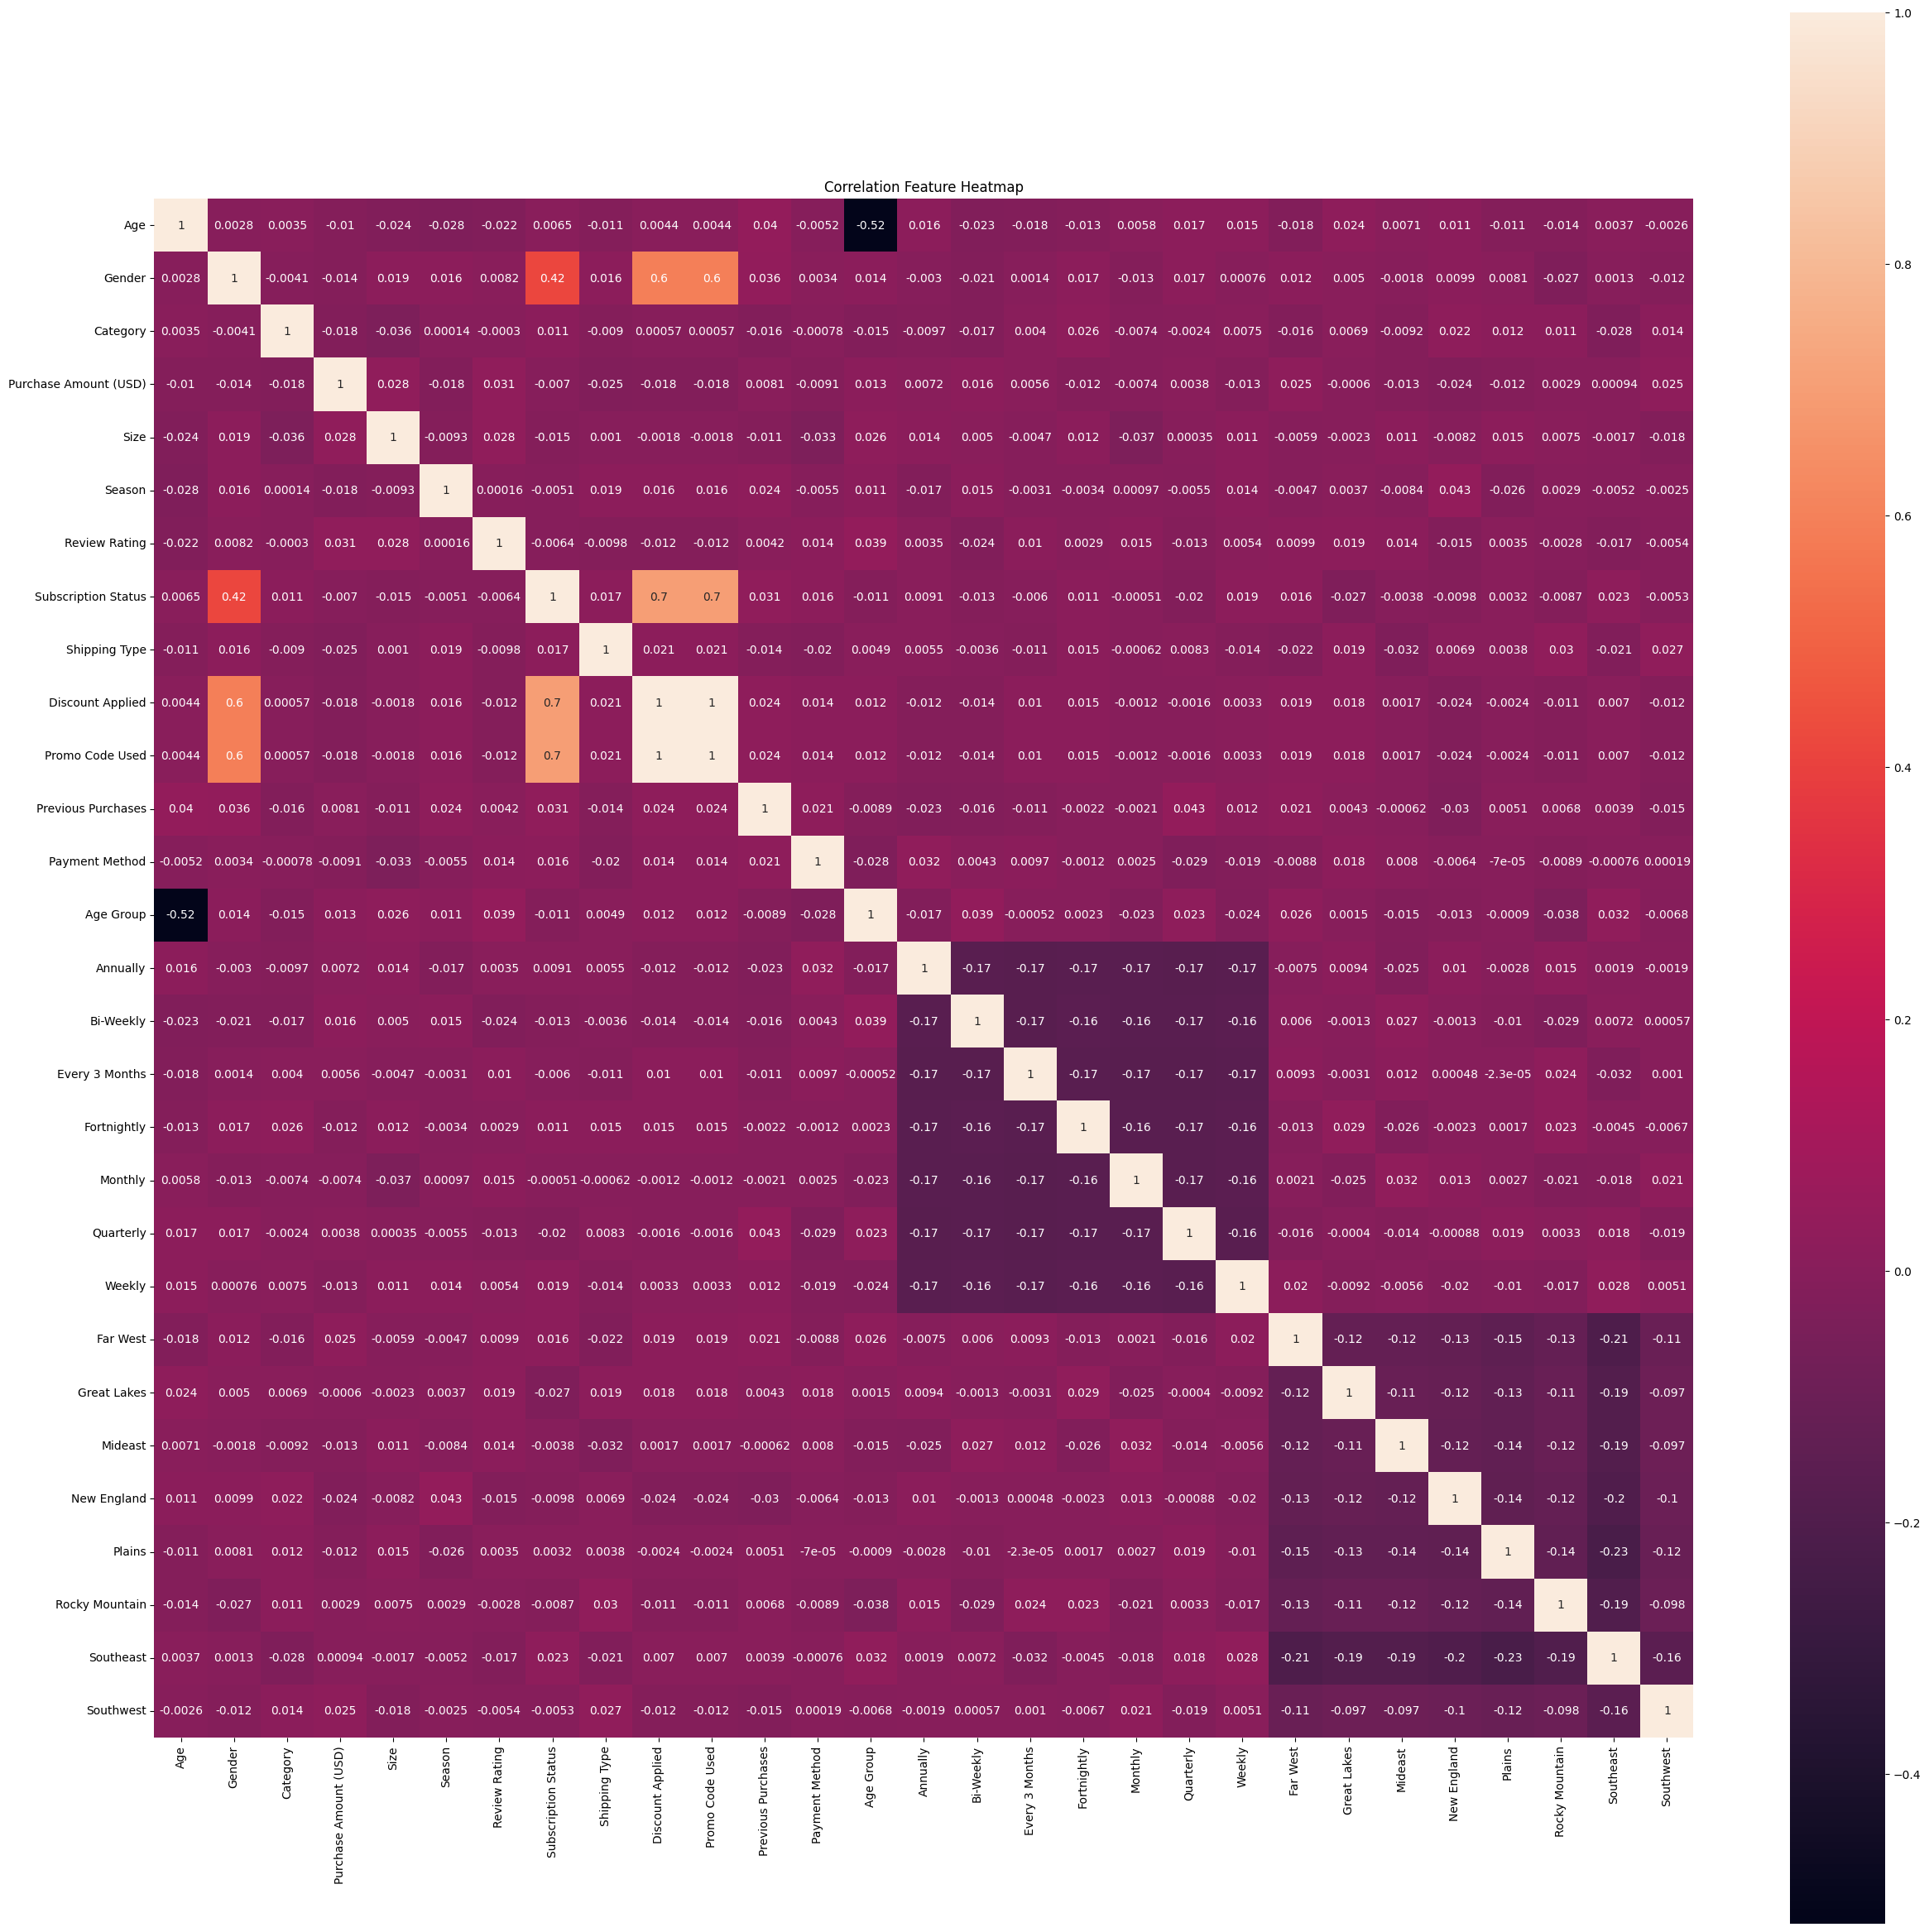

In [48]:
corrmat = process_data.corr(method='pearson')
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(corrmat, annot=True, vmax=1, square=True);
plt.title('Correlation Feature Heatmap');
plt.show()

## Feature Selection Using Embedded Method

### Model using X_train dan y_train

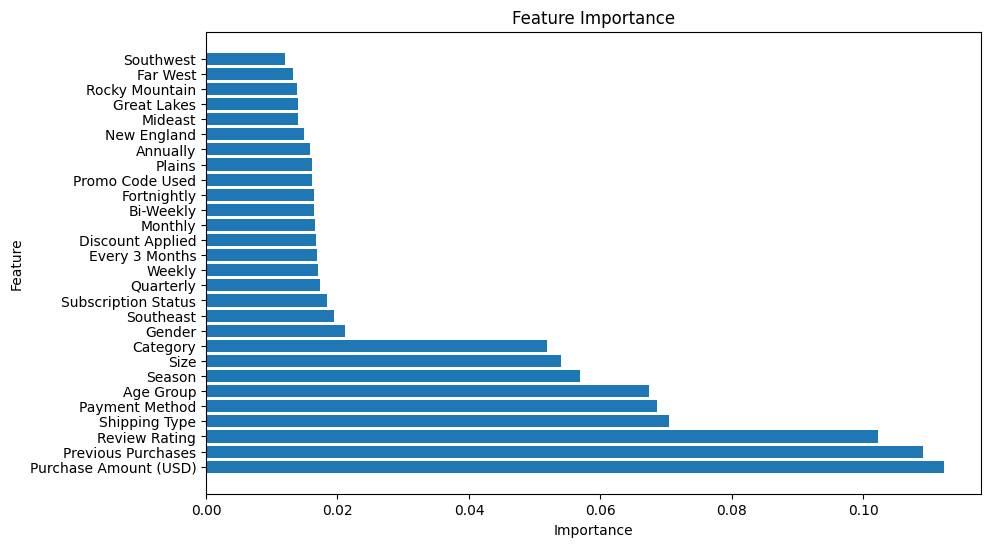

In [49]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

feature_importances = model.feature_importances_

importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

### Model using MinMax Scaler

In [64]:
X_mm = process_data.drop('Age', axis=1)
X_mm.head()

,Gender,Category,Purchase Amount (USD),Size,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,...,Quarterly,Weekly,Far West,Great Lakes,Mideast,New England,Plains,Rocky Mountain,Southeast,Southwest
0,1,1,53,0,3,3.1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1,1,1,64,0,3,3.1,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0
2,1,1,73,2,1,3.1,1,2,1,1,...,0,1,0,0,0,1,0,0,0,0
3,1,2,90,1,1,3.5,1,3,1,1,...,0,1,0,0,0,1,0,0,0,0
4,1,1,49,1,1,2.7,1,2,1,1,...,0,0,1,0,0,0,0,0,0,0


In [66]:
scaler = MinMaxScaler()
X_mm  = pd.DataFrame(scaler.fit_transform(X_mm) , columns = X_mm.columns)

In [67]:
y_mm= process_data["Age"]
y_mm.head()

0    55
1    19
2    50
3    21
4    45
Name: Age, dtype: int64

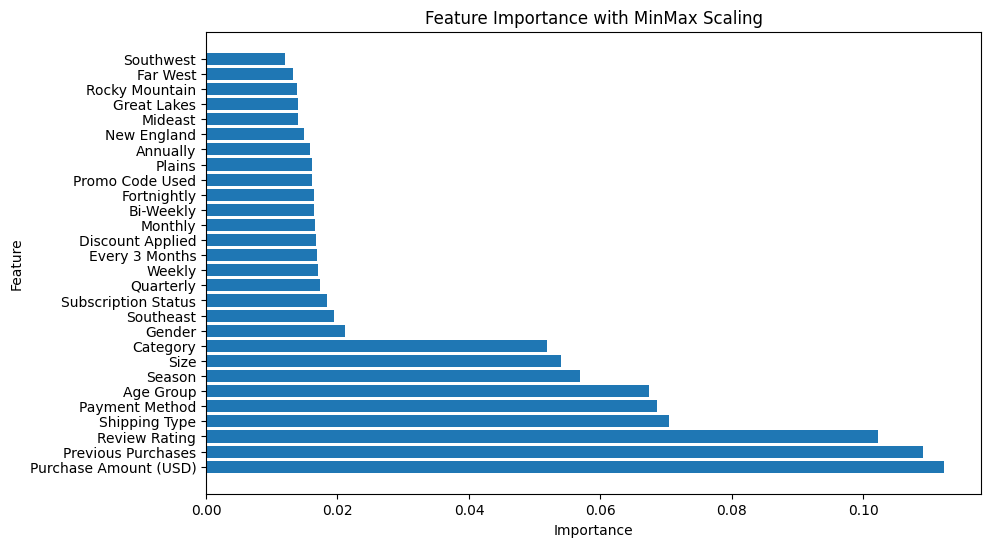

In [68]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_mm, y_mm)

feature_importances = model.feature_importances_

importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance with MinMax Scaling')
plt.show()

Sama saja ternyata

## Imbalanced Data Using Oversampling

In [52]:
y_train.value_counts()

69    88
57    87
41    86
25    85
49    84
50    83
54    83
27    83
62    83
32    82
19    81
58    81
42    80
43    79
28    79
31    79
37    77
46    76
29    76
68    75
59    75
63    75
56    74
36    74
55    73
52    73
64    73
35    72
51    72
65    72
40    72
45    72
47    71
66    71
30    71
23    71
38    70
53    70
18    69
21    69
26    69
34    68
48    68
24    68
39    68
70    67
22    66
61    65
60    65
33    63
20    62
67    54
44    51
Name: Age, dtype: int64

In [53]:
oversampler = RandomOverSampler(random_state=42)
X_train, y_train = oversampler.fit_resample(X_train, y_train)
y_train.value_counts()

55    88
70    88
67    88
20    88
39    88
42    88
68    88
49    88
59    88
47    88
40    88
41    88
48    88
22    88
24    88
44    88
37    88
58    88
32    88
62    88
51    88
28    88
43    88
34    88
23    88
69    88
29    88
19    88
35    88
50    88
21    88
45    88
46    88
63    88
27    88
26    88
57    88
53    88
30    88
61    88
65    88
64    88
25    88
52    88
66    88
31    88
56    88
18    88
38    88
54    88
33    88
36    88
60    88
Name: Age, dtype: int64

### After Oversampling 'Age' handling

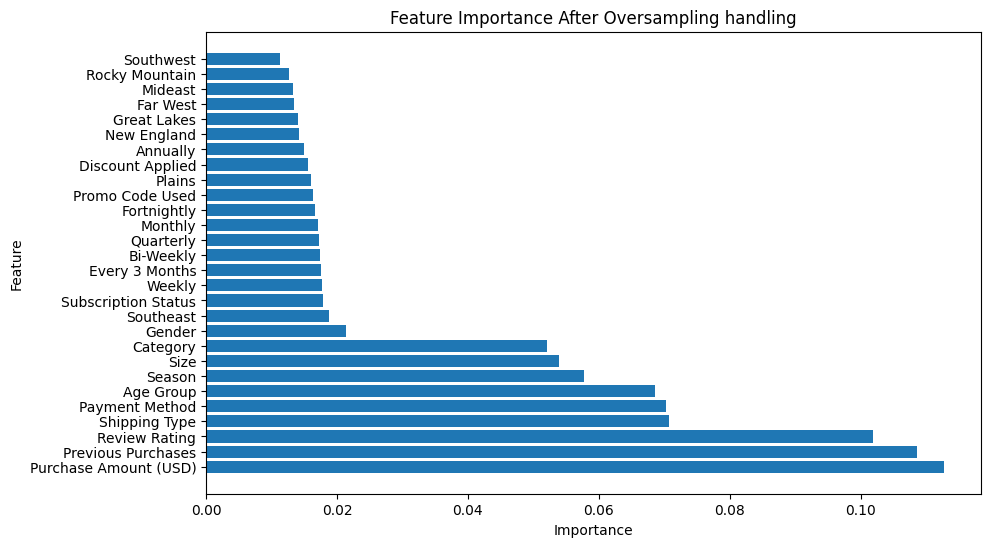

In [54]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

feature_importances = model.feature_importances_

importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance After Oversampling handling')
plt.show()